In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os.path
from os import path

In [2]:
#import data & plot
%matplotlib inline
#%matplotlib widget
N_ccn=np.array([100]) #[100, 1000]
N_seed=np.array([1, 3, 7])
r_seed=np.array([1, 3, 7])
ncolor = 4
colors=np.zeros((4,ncolor,4))
colors[0,:,:] = plt.cm.PiYG(np.linspace(0,1,ncolor))
colors[1,:,:] = plt.cm.seismic(np.linspace(0,1,ncolor))
colors[2,:,:] = plt.cm.OrRd(np.linspace(0,1,ncolor))
ncolor=12
color_new=plt.cm.jet(np.linspace(0,1,ncolor))

IndexError: index 4 is out of bounds for axis 1 with size 4

<Figure size 432x288 with 0 Axes>

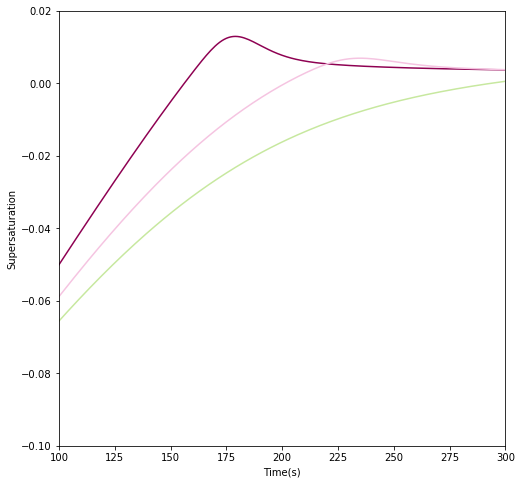

In [40]:
##supersat with multi colormap

plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('Supersaturation')
ax.set_xlim(100,300)
ax.set_ylim(-0.1,0.02)
xxx=1

folder_dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/parcel/'
for (inccn,inseed) in itertools.product(N_ccn,N_seed):
    j=np.where(N_ccn==int(inccn))
    k=np.where(N_seed==int(inseed))
    n=j[0][0]*2+k[0][0]
    for (i,irseed) in zip(range(r_seed.size),r_seed):
        filename='ccnN'+ str(inccn)+'/mono_r'+str(irseed)+'n'+str(inseed)+'/IUGG.out'
        filedir=folder_dir+filename
        df = pd.read_csv(filedir,sep='\s+',header=None,names=\
                     ['time','H','Sp','lwc','rad1','rad2','Pp','temperature','thetapp',\
                      'qvpp','qvs','rm','rhoa','whatever','deltaqp'])
        figlabel='$N_{ccn}$='+str(inccn)+', $r_{seed}$='+str(irseed)+', $n_{seed}$='+str(inseed)
        ax.plot(df.time, df.Sp,label=figlabel,color=colors[i,n])
ax.legend(bbox_to_anchor=(1, 1.05))
fig.savefig('Ss.png')

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

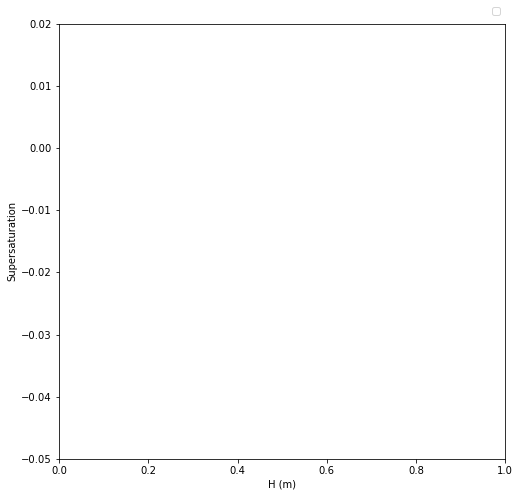

In [41]:
##supersat one colormap

plt.clf()
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('H (m)')
ax.set_ylabel('Supersaturation')
#qax.set_xlim(0,1200)
ax.set_ylim(-0.05,0.02)
n=0
folder_dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/parcel/'
for (inccn,inseed,irseed) in itertools.product(N_ccn,N_seed,r_seed):
    filename='ccnN'+ str(inccn)+'/mono_r'+str(irseed)+'n'+str(inseed)+'/IUGG.out'
    filedir=folder_dir+filename
    if path.exists(filedir):
        df = pd.read_csv(filedir,sep='\s+',header=None,names=\
                    ['time','H','Sp','lwc','rad1','rad2','Pp','temperature','thetapp',\
                    'qvpp','qvs','rm','rhoa','whatever','deltaqp'])
        figlabel='$N_{ccn}$='+str(inccn)+', $r_{seed}$='+str(irseed)+', $n_{seed}$='+str(inseed)
        ax.plot(df.H, df.Sp,label=figlabel,color=color_new[n])
        n=n+1
ax.legend(bbox_to_anchor=(1, 1.05))
fig.savefig('Ss_Nccn100Rseed10.png')

In [227]:
N_ccn=np.array([100,1000]) #[100, 1000]
N_ccn.dtype

dtype('int64')

In [193]:
r_seed.size

3

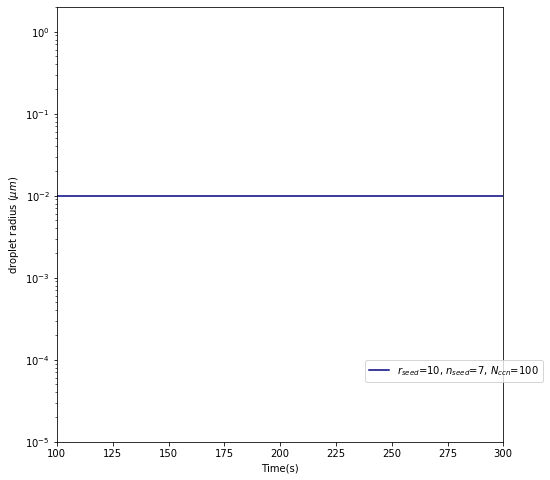

In [38]:
##drop size of background ccn
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('droplet radius ($\mu m$)')
ax.set_xlim(100,300)
ax.set_yscale('log')
ax.set_ylim(1e-1,2)
n=0
for (irseed,inseed,inccn) in itertools.product(r_seed,N_seed,N_ccn):
    folder_dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/parcel/'
    filename='ccnN'+ str(inccn)+'/mono_r'+str(irseed)+'n'+str(inseed)+'/IUGG.out'
    filedir=folder_dir+filename
    df = pd.read_csv(filedir,sep='\s+',header=None,names=\
                     ['time','H','Sp','lwc','rad1','rad2','Pp','temperature','thetapp',\
                      'qvpp','qvs','rm','rhoa','whatever','deltaqp'])
    figlabel='$r_{seed}$='+str(irseed)+', $n_{seed}$='+str(inseed)+', $N_{ccn}$='+str(inccn)
    ax.plot(df.H, df.rad1*1e6,label=figlabel,color=color_new[n])
    n=n+1
ax.legend(bbox_to_anchor=(1.1, .2))
fig.savefig('radius1.png')

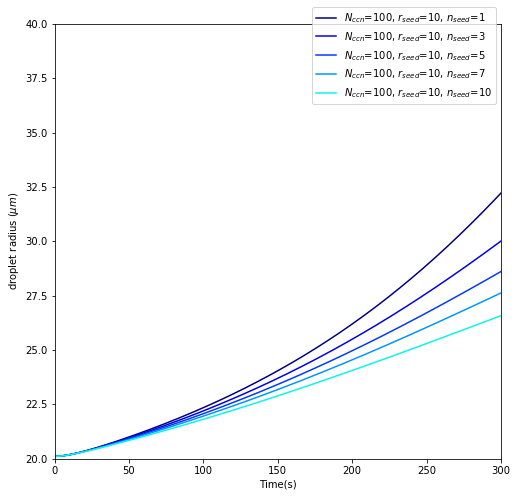

In [16]:
##drop size of seeded particles
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('droplet radius ($\mu m$)')
ax.set_xlim(0,300)
#ax.set_yscale('log')
ax.set_ylim(20,40)
n=0
for (inccn,inseed,irseed) in itertools.product(N_ccn,N_seed,r_seed):
    folder_dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/parcel/'
    filename='ccnN'+ str(inccn)+'/mono_r'+str(irseed)+'n'+str(inseed)+'/IUGG.out'
    filedir=folder_dir+filename
    df = pd.read_csv(filedir,sep='\s+',header=None,names=\
                     ['time','H','Sp','lwc','rad1','rad2','Pp','temperature','thetapp',\
                      'qvpp','qvs','rm','rhoa','whatever','deltaqp'])
    figlabel='$N_{ccn}$='+str(inccn)+', $r_{seed}$='+str(irseed)+', $n_{seed}$='+str(inseed)
    ax.plot(df.H, df.rad2*1e6,label=figlabel,color=color_new[n])
    n=n+1
ax.legend(bbox_to_anchor=(1, 1.05))
fig.savefig('radius2.png')

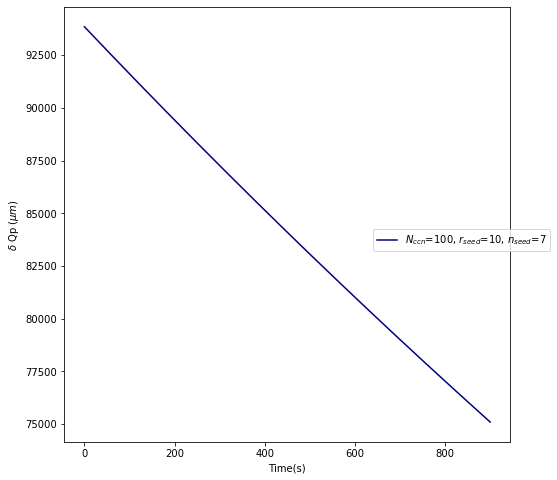

In [53]:
##temperature#
fig,ax=plt.subplots(figsize=(8, 8))
ax.set_xlabel('Time(s)')
ax.set_ylabel('$\delta$ Qp ($\mu m$)')
#ax.set_xlim(0,1000)
#ax.set_yscale('log')
#ax.set_ylim(278,285)
n=0
for (inccn,inseed,irseed) in itertools.product(N_ccn,N_seed,r_seed):
    folder_dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/parcel/'
    filename='ccnN'+ str(inccn)+'/mono_r'+str(irseed)+'n'+str(inseed)+'/IUGG.out'
    filedir=folder_dir+filename
    if path.exists(filedir):
        df = pd.read_csv(filedir,sep='\s+',header=None,names=\
                     ['time','H','Sp','lwc','rad1','rad2','Pp','temperature','thetapp',\
                      'qvpp','qvs','rm','rhoa','whatever','deltaqp'])
        figlabel='$N_{ccn}$='+str(inccn)+', $r_{seed}$='+str(irseed)+', $n_{seed}$='+str(inseed)
        ax.plot(df.time, df.Pp,label=figlabel,color=color_new[n])
        n=n+1
ax.legend(bbox_to_anchor=(1.1, .5))
fig.savefig('dqp.png')

In [30]:
#plot particle size distribution
folder_dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/parcel/'
subfolder='multidisperse/polluted/r5n5/'
filename1='IUGG.dsd'
filename2='IUGG.rad'
filedir1=folder_dir+subfolder+filename1
filedir2=folder_dir+subfolder+filename2
if path.exists(filedir1):
    df_dsd = pd.read_csv(filedir1,sep='\s+',header=None)
if path.exists(filedir2):
    df_rad = pd.read_csv(filedir2,sep='\s+',header=None)
    
